# Reading EBAS NILU data from particle size distribution from Zeppelin 2000-2007

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyaerocom as pya
import glob
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from tuuli_functions import size_dist_to_xarray
from tuuli_functions import lognorm_to_concentration
from tuuli_functions import load_seaice_xarray

/opt/conda/lib/python3.7/site-packages/geonum/__init__.py:39: UserWarning: Plotting of maps etc. is deactivated, please install Basemap
  warn('Plotting of maps etc. is deactivated, please install Basemap')


In [2]:
# reading all the files together into a new array with pyaerocom
arrs1 = []
for filepath in glob.glob('EBAS_FILES_2000_2007/*.nas'):
    filedata = pya.io.EbasNasaAmesFile(filepath)
    arrs1.append(size_dist_to_xarray(filedata))    

In [3]:
# Sorting the previously acquired array by time
arr1 = arrs1[0]
for array1 in arrs1[1:]:
    arr1 = xr.concat([arr1, array1], dim='time')

In [4]:
# Turn arr1 to Pandas-dataframe for easier handling
df1 = arr1.to_dataframe().unstack('d_index')
cols = [x[1] for x in df1.columns.values]
# Transpose the dataframe for the futher analysis
df1_turned = df1.T.loc['sized']

In [5]:
# Get data for 1 Mar 2000 - 31 Dec 2007 for diameters within 20-50nm
# Column names 1-5 represents diameters from 20-50nm 
Ntot_20_50_2000_2007 = lognorm_to_concentration(df1_turned,1,5,'2000-03-01 00:30:00','2007-12-31 19:29:59')

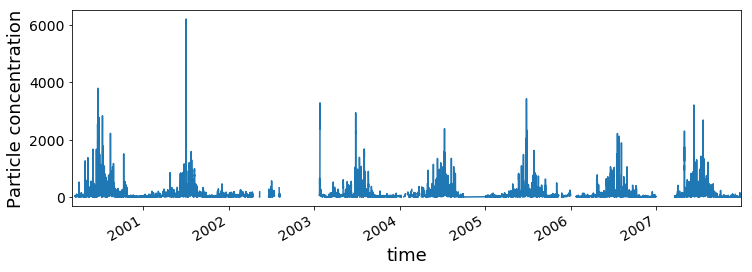

In [6]:
# Take a look at the data as a sanity check
Ntot_20_50_2000_2007.plot(figsize=(12,4))
plt.ylabel('Particle concentration')
plt.savefig('sanitycheck_1.png',bbox_inches = 'tight',pad_inches=0.1)

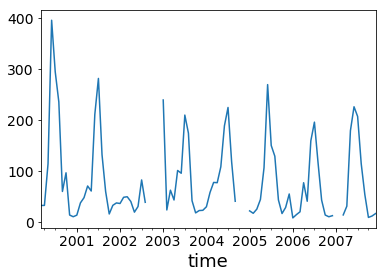

In [7]:
# Plot the same data but in monthly means
Ntot_20_50_2000_2007.resample('M').mean().plot()

# Reading EBAS NILU data from particle size distribution from Zeppelin 2008-2009


In [8]:
# Reading all the files together into a new array with pyaerocom
arrs2 = []
for filepath2 in glob.glob('ebasfiles_2008_2009/*.nas'):
    filedata2 = pya.io.EbasNasaAmesFile(filepath2)
    arrs2.append(size_dist_to_xarray(filedata2, step=1))

In [9]:
# Sorting the previously acquired array by time
arr2 = arrs2[0]
for array2 in arrs2[1:]:
    arr2 = xr.concat([arr2, array2], dim='time')

In [10]:
# Turn arr1 to Pandas-dataframe for easier handling
df2 = arr2.to_dataframe().unstack('d_index')
cols2 = [y[1] for y in df2.columns.values]
cols2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


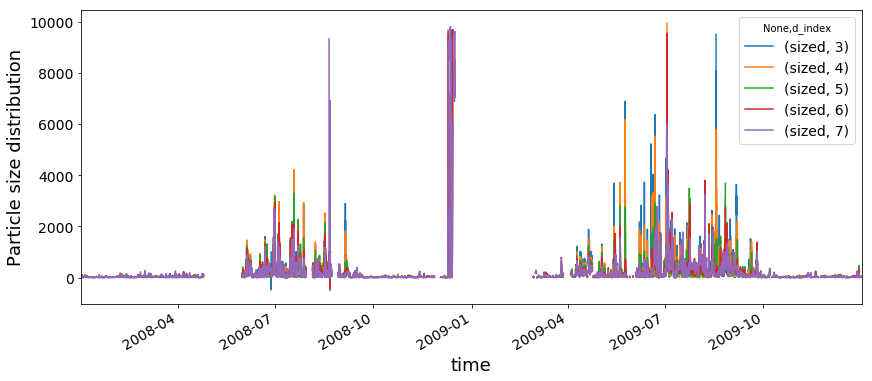

In [11]:
# Masking the data to remove the overly large values which are not real

dd=df2.iloc[:,3:8] #First selecting right particle size range (20-50nm) to a new dataframe dd
mask = dd >10000 #Creating a mask of values over than 10000
dd[mask] = np.nan #Setting those values to NaN

# Plotting shows that in the end of 2009 there is weird peak
dd.plot(figsize=(14, 6))
plt.ylabel('Particle size distribution')
plt.savefig('particle_size_08_09_not_converted.png')

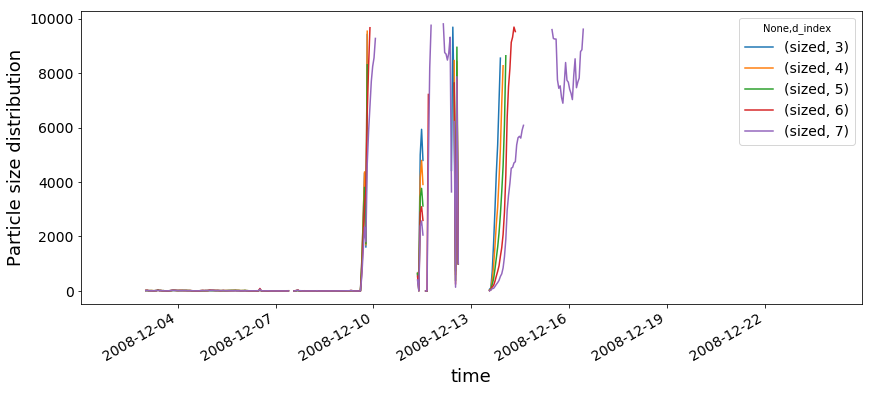

In [12]:
# Plotting only the weird subset to see better
weird_subset = dd["2008-12-01":"2008-12-24"]
weird_subset.plot(figsize=(14, 6))
plt.ylabel('Particle size distribution')
plt.savefig('particle_size_weird_subset.png')

In [13]:
# Setting the time when the weird subset happened to NaN 
dd["2008-12-01":"2008-12-24"] = np.nan

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(key, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return 

In [14]:
# Transpose the dataframe for the futher analysis
dd_turned = dd.T.loc['sized']

# Get data for 1 Jan 2008 - 31 Dec 2009 for diameters within 20-50nm
# Column names 3-7 represents diameters from 20-50nm 
Ntot_20_50_2008_2009 = lognorm_to_concentration(dd_turned,3,7,'2008-01-01 00:30:00','2009-12-31 23:29:59')

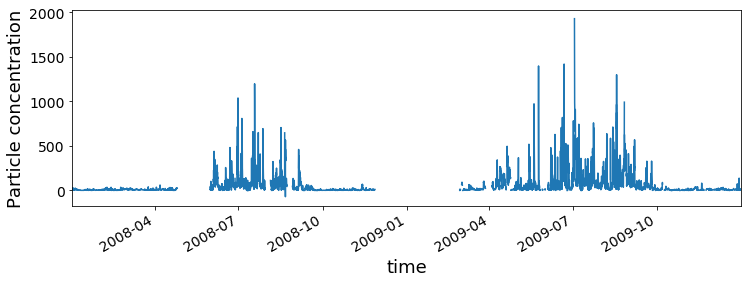

In [15]:
# Take a look at the data as a sanity check
Ntot_20_50_2008_2009.plot(figsize=(12,4))
plt.ylabel('Particle concentration')
plt.savefig('sanitycheck_2.png',bbox_inches = 'tight',pad_inches=0.1)

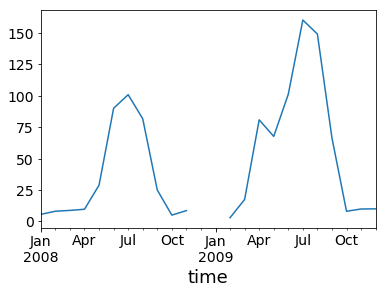

In [16]:
# Plot the same data but in monthly means
Ntot_20_50_2008_2009.resample('M').mean().plot()

# Reading CSV data from particle size distribution from Zeppelin 2010-2014

In [17]:
datadir = '/home/2daa7756-2d5725-2d4dfb-2db0ff-2d5e0a6858a009/shared-ns1000k/inputs//Aerosol_sizedist_obs/'
filenam1 = datadir + 'Zeppelin_2010_hourly.csv'
filenam2 = datadir + 'Zeppelin_2011_hourly.csv'
filenam3 = datadir + 'Zeppelin_2012_hourly.csv'
filenam4 = datadir + 'Zeppelin_2013_hourly.csv'
filenam5 = datadir + 'Zeppelin_2015_hourly.csv'

flist=[filenam1, filenam2, filenam3, filenam4, filenam5]

# Creating a date parser
mydateparser = lambda x: pd.datetime.strptime(x, "%Y %m %d %H %M")

# Go through each file and append them together. 
# Date is split in five first columns, so we parse them together using 'mydateparser'.

datalist = []
for f in flist:
    datalist.append(pd.read_csv(f, parse_dates=[['0','0.1','0.2','0.3','0.4']],date_parser = mydateparser))
# Convert the new 'datalist' to data frame    
data3 = pd.concat(datalist, axis=0)

# When parsing the header is also affected so we give it a new name, 'date'
data3.rename(columns={'0_0.1_0.2_0.3_0.4':'date'}, inplace = True)
# Set indices of the rows to date
data3 = data3.set_index('date')
# Remove last column
data3.drop(labels='0.6', axis=1, inplace=True) 

# Change all the incorrect values (-999) to NaN
data3 = data3.replace(-999,np.nan)

# Check the names of the columns, now they are the same as the diameter of the particles 
data3.columns = [float(ii) for ii in data3.columns]
data3.columns

Float64Index([   0.5,   20.0,  22.44, 25.179, 28.251, 31.698, 35.566, 39.905,
              44.774, 50.238, 56.368, 63.246, 70.963, 79.621, 89.337, 100.24,
              112.47, 126.19, 141.59, 158.87, 178.25,  200.0,  224.4, 251.79,
              282.51, 316.98, 355.66, 399.05, 447.74, 502.38],
             dtype='float64')

In [18]:
# Transpose the dataframe for the futher analysis
new_d=data3.T

In [19]:
# Get data for 1 Jan 2010 - 28 Aug 2013 for diameters within 20-50nm
# Column names 20.0-50.238represents diameters from 20-50nm 
Ntot_20_50_2010_2013 = lognorm_to_concentration(new_d,20.0,50.238,'2010-01-01 00:00:00','2012-12-31 08:00:00')

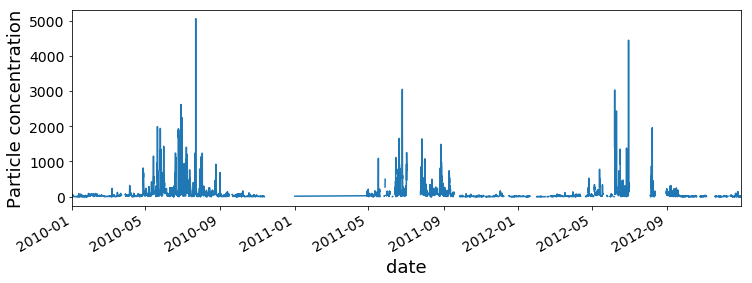

In [20]:
# Take a look at the data as a sanity check
Ntot_20_50_2010_2013.plot(figsize=(12,4))
plt.ylabel('Particle concentration')
plt.savefig('sanitycheck_3.png',bbox_inches = 'tight',pad_inches=0.1)

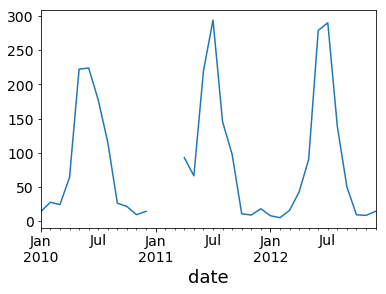

In [21]:
# Plot the same data but in monthly means
Ntot_20_50_2010_2013.resample('M').mean().plot()

# Reading wind direction data from Zeppelin 2000-2013

In [22]:
# reading all the wind direction files together into a new array with pyaerocom
winddir = []
for filepath4 in glob.glob('ebas_winddir/*.nas'):
    filedata4 = pya.io.EbasNasaAmesFile(filepath4)
    winddir.append(filedata4.to_dataframe().wind_direction_deg)

In [23]:
# Sorting the previously acquired array by time
all_wind = winddir[0]
for data in winddir[1:]:
    all_wind = pd.concat([all_wind, data], axis=0)
all_wind.sort_index(inplace=True)

In [24]:
# Taking hourly mean from the data.
# Wind data and concentration data needs to start at the same time step that they can be used together
all_wind_avg = all_wind.resample('H').mean()
all_wind_avg

2000-01-01 00:00:00      NaN
2000-01-01 01:00:00      NaN
2000-01-01 02:00:00    105.0
2000-01-01 03:00:00    119.0
2000-01-01 04:00:00    103.0
                       ...  
2013-08-28 04:00:00    169.0
2013-08-28 05:00:00    168.0
2013-08-28 06:00:00    172.0
2013-08-28 07:00:00    170.0
2013-08-28 08:00:00    171.0
Freq: H, Name: wind_direction_deg, Length: 119721, dtype: float64

In [25]:
# Creating a mask for the wind directions. 
# Selecting only those times (hours) when wind comes from west or northwest
filter_mask = all_wind_avg.between(260, 350) 
# Concentration starts on 1st of March 2000, so we need to make the wind data to start at the same time 
March_index = filter_mask.index > pd.to_datetime('2000-03-01 00:00:00')  
new_filter = filter_mask[March_index]



## Plotting the concentration timeseries together

In [26]:
# Creating a variable which contains all of the particle concentration data
part1 = Ntot_20_50_2000_2007.resample('H').mean()
part2 = Ntot_20_50_2008_2009.resample('H').mean()
part3 = Ntot_20_50_2010_2013

frames = [part1,part2,part3]
Ntot_20_50_ALL = pd.concat(frames)

Ntot_20_50_ALL

2000-03-01 00:00:00          NaN
2000-03-01 01:00:00          NaN
2000-03-01 02:00:00          NaN
2000-03-01 03:00:00          NaN
2000-03-01 04:00:00          NaN
                         ...    
2012-12-30 19:00:00     6.656349
2012-12-30 20:00:00     8.842712
2012-12-30 21:00:00    10.232560
2012-12-30 22:00:00    14.357250
2012-12-30 23:00:00     7.784832
Length: 109690, dtype: float64

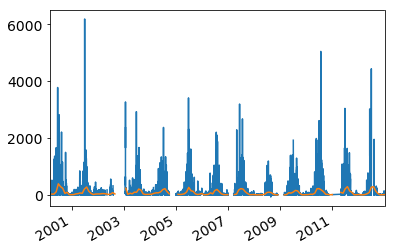

In [27]:
# Take a look at the data as a sanity check with all the data and the monthly means
Ntot_20_50_ALL.plot()
Ntot_20_50_ALL.resample('M').mean().plot()

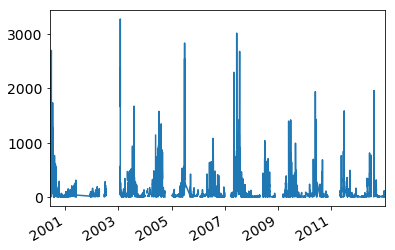

In [28]:
# averaging over the whole wind dataframe (all_wind). 
# Using only westerly and north-westerly winds, so not caring about wrong average over 360 and 0 degrees

interp_mask = np.interp(Ntot_20_50_ALL.index,new_filter.index,new_filter.values)
west_filter = interp_mask > 0
west_filter

other_dir_filter = interp_mask == 0

Ntot_20_50_ALL[west_filter].plot()

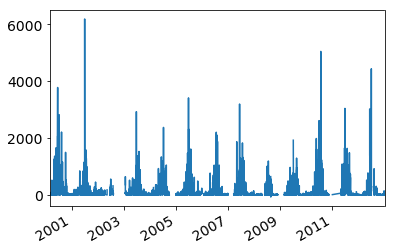

In [29]:
Ntot_20_50_ALL[other_dir_filter].plot()

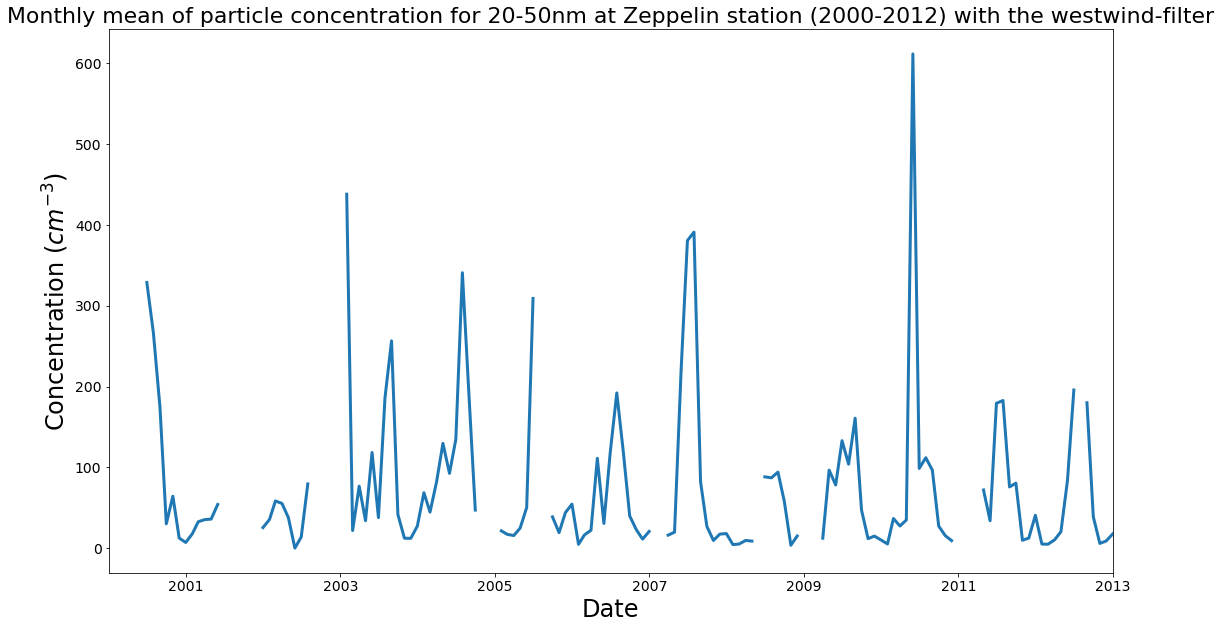

In [30]:
# Plotting the particle concentration with the westwind-filter
plt.figure(1,figsize=[18,10])
plt.plot(Ntot_20_50_ALL[west_filter].resample('M').mean(),linewidth=3)
plt.savefig('particle_cons_month_mean_westwind.png')
plt.xlim('2000','2013')
plt.ylabel('Concentration ($cm^{-3}$)',fontsize=24)
plt.xlabel('Date',fontsize=24)
plt.title('Monthly mean of particle concentration for 20-50nm at Zeppelin station (2000-2012) with the westwind-filter',fontsize=22)
plt.savefig('filtered_particle_cons_month_mean.png',bbox_inches = 'tight',pad_inches=0.1)

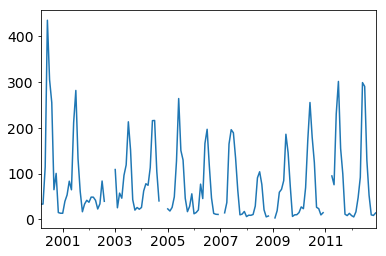

In [31]:
Ntot_20_50_ALL[other_dir_filter].resample('M').mean().plot()

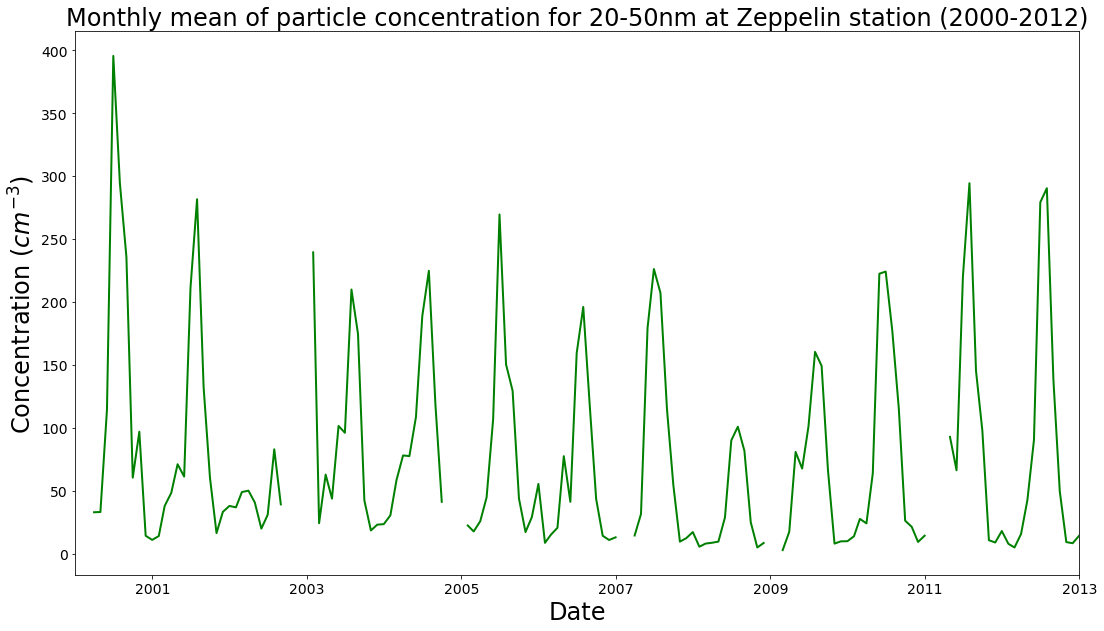

In [32]:
# Plotting the final particle concentration plot
plt.figure(1,figsize=[18,10])
plt.plot(Ntot_20_50_ALL.resample('M').mean(),color='g', linewidth = 2)
plt.xlim('2000','2013')
plt.xlabel('Date',fontsize=24)
plt.ylabel('Concentration ($cm^{-3}$)',fontsize=24)
plt.title('Monthly mean of particle concentration for 20-50nm at Zeppelin station (2000-2012)',fontsize=24)
plt.savefig('particle_cons_month_mean.png')

# Reading the reanalyzed sea ice extent data (1979-2012)

In [33]:
DATA_DIR = '/home/notebook/shared-ns1000k/inputs/SEAICE_M/'
FILE = 'ci.mon.mean.nc'

In [34]:
# Loading the data from the server
def load_seaice_xarray(filepath, shift_lons=True):
    import iris, xarray
    cube = iris.load_cube(DATA_DIR + FILE)
    if shift_lons:
        cube = cube.intersection(longitude=(-180, 180))
    return xarray.DataArray.from_iris(cube)

In [35]:
seaice_xarr = load_seaice_xarray(DATA_DIR + FILE)
seaice_xarr

/opt/conda/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'ci' invalid units '(0 - 1)'
  warnings.warn(msg)


<xarray.DataArray 'ci' (time: 408, latitude: 241, longitude: 480)>
dask.array<filled, shape=(408, 241, 480), dtype=float64, chunksize=(136, 241, 240), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2012-12-01
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * longitude  (longitude) float64 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
Attributes:
    long_name:      Sea-ice cover
    invalid_units:  (0 - 1)
    Conventions:    CF-1.0
    history:        2013-10-08 12:17:20 GMT by mars2netcdf-0.92

Text(0.5,-0.1,'2001-07-01')

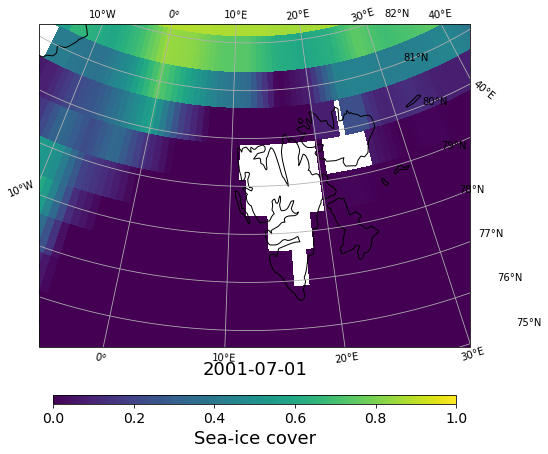

In [36]:
# Creating a map of Svalbard and the surrounding sea area and the sea ice extent with NorthPolarStereo -projection
extent = [-5, 30, 75, 82]
date_selected='2001-07-01'
ci = seaice_xarr.sel(time=date_selected, method='nearest')
fig = plt.figure(figsize=(14,6), constrained_layout=True)
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=12))
ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True)
p=ci.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=0, vmax=1, cbar_kwargs={'shrink': 0.4, 'orientation': 'horizontal'})
plt.title(date_selected, y=-0.1)
# plt.savefig('2000-09-01_seaice.png',bbox_inches = 'tight')

In [37]:
# Creating variables to different moths, which have the one selected month in every year

selected_years_jun = seaice_xarr.isel(time=[258,270,282,294,306,318,330,342,354,366,378,390,402]).sel(latitude=slice(82,75),longitude=slice(-5,30))
selected_years_sep = seaice_xarr.isel(time=[272,284,296,308,320,332,344,356,368,380,392,404]).sel(latitude=slice(82,75),longitude=slice(-5,30))
selected_years_may = seaice_xarr.isel(time=[268,280,292,304,316,328,340,352,364,376,388,400]).sel(latitude=slice(82,75),longitude=slice(-10,30))
selected_years_jun_min = seaice_xarr.isel(time=[258,270,282,306,390,402]).sel(latitude=slice(82,75),longitude=slice(-5,30))
selected_years_jun_max = seaice_xarr.isel(time=[354,366]).sel(latitude=slice(82,75),longitude=slice(-5,30))

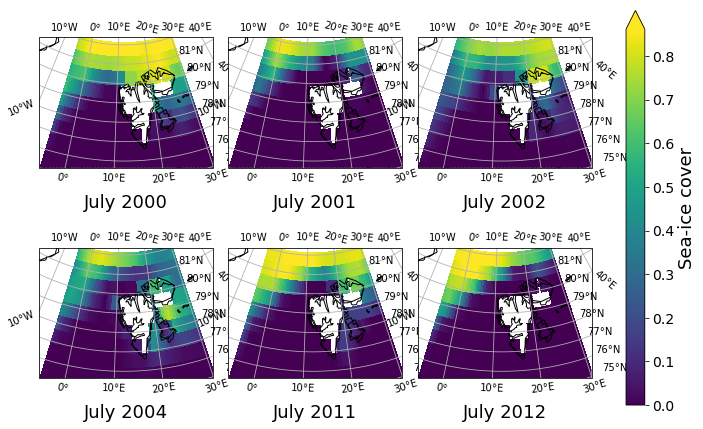

In [38]:
# Plotting together sea ice extent maps of all the years whith the same month
extent = [-5, 30, 75, 82]
proj_plot = ccrs.NorthPolarStereo(central_longitude=12)

p = selected_years_jun_min.plot(x='longitude', y='latitude', transform=ccrs.PlateCarree(),
              subplot_kws={"projection": proj_plot},
              col='time', col_wrap=3, robust=True, cmap='viridis')
    
    

for ax,i in zip(p.axes.flat,selected_years_jun_min.time.values):
    ax.coastlines()
    ax.set_extent(extent)
    ax.coastlines(resolution='50m')
    ax.gridlines(draw_labels=True)
    ax.set_title(pd.to_datetime(str(i)).strftime("%B %Y"), fontsize=18, y=-0.35)
    
plt.savefig('seaice_maps_min.png',bbox_inches = 'tight',pad_inches=0.1)#,orientation='portrait')   

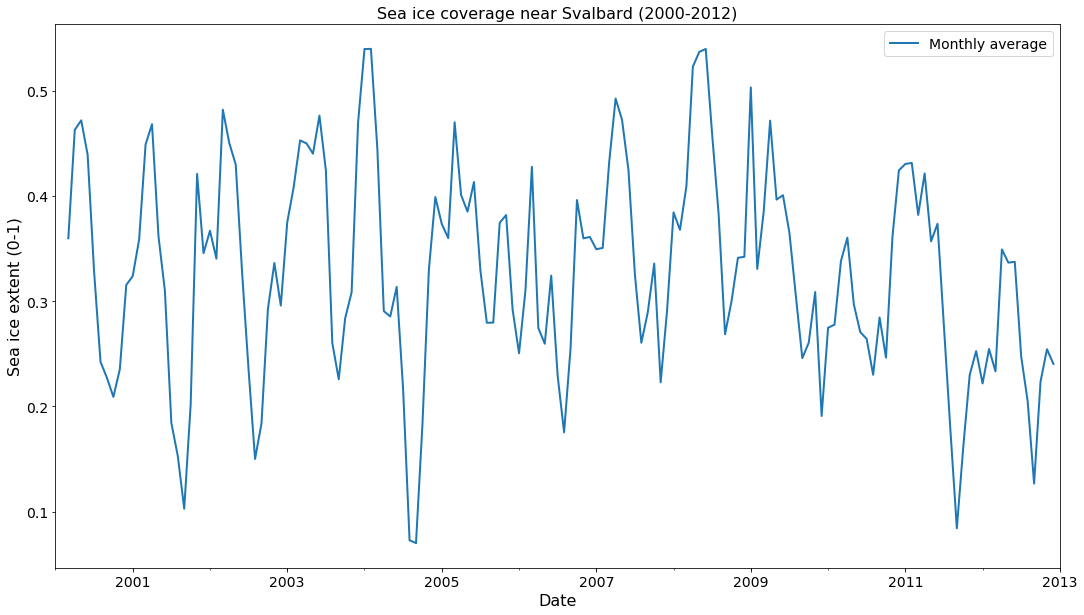

In [39]:
# From the whole sea ice dataset (which keeps inside the whole Arctic ocean) creating an new subset.
# In the Svalbard subset there is only the sea ice extent near Svalbard area
svalbard_subset = seaice_xarr.sel(latitude=slice(82, 76),longitude=slice(-2,20))
sea_ice_timeseries = svalbard_subset.mean(('latitude', 'longitude'))
df_seaice = sea_ice_timeseries.to_dataframe()
df_everymonth = df_seaice['2000-03-01':'2012-12-31']

# Plotting the sea ice extent monthly time series 
plt.figure(2, figsize=[18,10])

ax = plt.subplot(1, 1, 1)
df_everymonth.plot(ax=ax,linewidth=2)
plt.xlim('2000','2013')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Sea ice extent (0-1)',fontsize=16)
leg=ax.legend(["Monthly average"],fontsize=14)
plt.title('Sea ice coverage near Svalbard (2000-2012)',fontsize=16)
plt.savefig('seaice_extent_monthly_2000_2012.png')

In [40]:
# Taking only the summer months (Apr-Sep) and creating a yearly mean out of them
df_everymonth['month'] = df_everymonth.index.month
mask = df_everymonth.month.between(4,9)
only_summer = df_everymonth[mask]
summer_mean = only_summer.resample('Y').mean()
df_everymonth.drop(['month'], axis=1, inplace=True)
summer_mean.drop(['month'], axis=1, inplace=True)
only_summer.drop(['month'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
Ntot_20_50_ALL_mean = Ntot_20_50_ALL.resample('M').mean()
Ntot_means = pd.DataFrame({'time':Ntot_20_50_ALL_mean.index, 'conc':Ntot_20_50_ALL_mean.values})
Ntot_means = Ntot_means.set_index('time')
Ntot_means['month'] = Ntot_means.index.month
mask = Ntot_means.month.between(4,9)
Ntot_only_summer = Ntot_means[mask]
Ntot_only_summer.drop(['month'], axis=1, inplace=True)

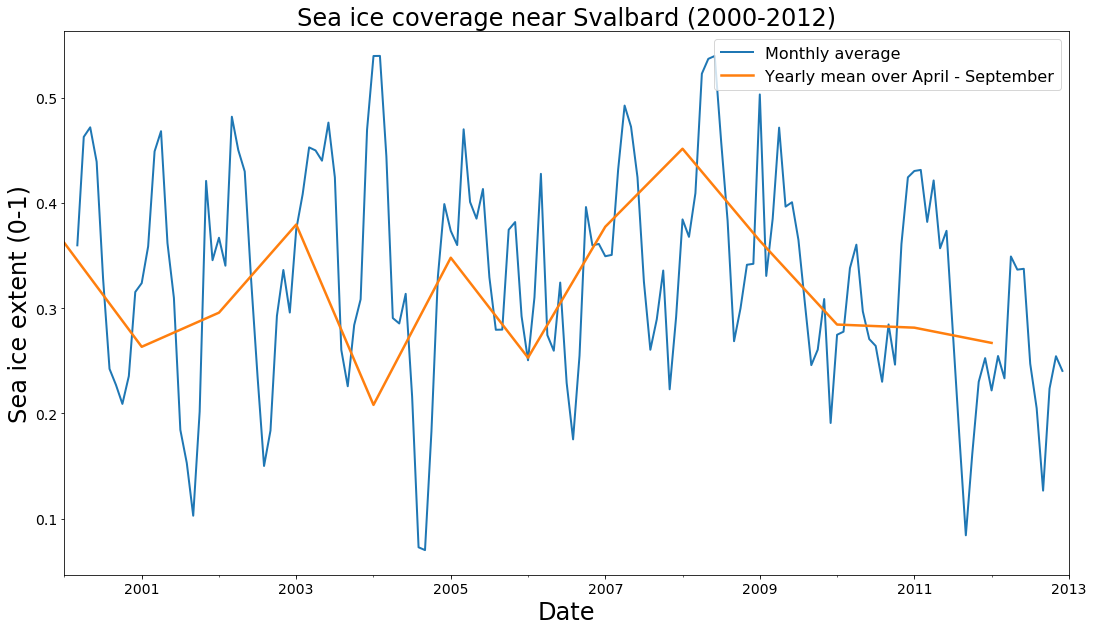

In [42]:
# Plotting the monthly averagesea ice extent and yearly summer-month mean together
plt.figure(1, figsize=[18,10])

ax = plt.subplot(1, 1, 1)
df_everymonth.plot(ax=ax,linewidth=2)
summer_mean.plot(ax=ax,linewidth=2.5)
plt.xlim('2000','2013')
plt.xlabel('Date',fontsize=24)
plt.ylabel('Sea ice extent (0-1)',fontsize=24)
leg=ax.legend(["Monthly average","Yearly mean over April - September"],fontsize=16)
plt.title('Sea ice coverage near Svalbard (2000-2012)',fontsize=24)
plt.savefig('seaice_extent_2000_2012.png')